In [6]:
import numpy as np # numerical calc package
import pandas as pd # holds data
import matplotlib.pyplot as plt # plotting library
import seaborn as sns # pretty plotting

# plotting config
sns.set(style='white', rc={'figure.figsize':(20,10)})

from sklearn.model_selection import train_test_split # split dataset
from sklearn.linear_model import LogisticRegression # linear model for classification
from sklearn.metrics import confusion_matrix

In [7]:
data = pd.read_csv("C:/Users/Asus/Desktop/census.csv")

In [8]:
data.shape

(45222, 14)

In [9]:
data.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
age                45222 non-null int64
workclass          45222 non-null object
education_level    45222 non-null object
education-num      45222 non-null float64
marital-status     45222 non-null object
occupation         45222 non-null object
relationship       45222 non-null object
race               45222 non-null object
sex                45222 non-null object
capital-gain       45222 non-null float64
capital-loss       45222 non-null float64
hours-per-week     45222 non-null float64
native-country     45222 non-null object
income             45222 non-null object
dtypes: float64(4), int64(1), object(9)
memory usage: 4.8+ MB


In [11]:
!pip install pandas_profiling

In [12]:
import pandas_profiling as pp

In [13]:
report = pp.ProfileReport(data)

In [14]:
report.to_file('census_data_assessement.html')

In [15]:
#Convert 'income' from object to numeric
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
data["inc"] = lb_make.fit_transform(data["income"])
data[["income", "inc"]].head(11)

,income,inc
0,<=50K,0
1,<=50K,0
2,<=50K,0
3,<=50K,0
4,<=50K,0
5,<=50K,0
6,<=50K,0
7,>50K,1
8,>50K,1
9,>50K,1


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 15 columns):
age                45222 non-null int64
workclass          45222 non-null object
education_level    45222 non-null object
education-num      45222 non-null float64
marital-status     45222 non-null object
occupation         45222 non-null object
relationship       45222 non-null object
race               45222 non-null object
sex                45222 non-null object
capital-gain       45222 non-null float64
capital-loss       45222 non-null float64
hours-per-week     45222 non-null float64
native-country     45222 non-null object
income             45222 non-null object
inc                45222 non-null int32
dtypes: float64(4), int32(1), int64(1), object(9)
memory usage: 5.0+ MB


In [17]:
#Creating dummies
gender = pd.get_dummies(data['sex'])
gender

,Female,Male
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0
...,...,...
45217,0,1
45218,1,0
45219,0,1
45220,0,1


In [18]:
#Creating dummies
educ_level = pd.get_dummies(data['education_level'])
educ_level

,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
45218,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
45219,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
45220,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [19]:
#Creating dummies
status = pd.get_dummies(data['marital-status'])
status

,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...
45217,0,0,0,0,1,0,0
45218,1,0,0,0,0,0,0
45219,0,0,1,0,0,0,0
45220,1,0,0,0,0,0,0


In [20]:
#Creating dummies
occupation = pd.get_dummies(data['occupation'])
occupation

,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,0,0,0,0,0,0,0,0,0,1,0,0,0,0
45218,0,0,0,0,0,0,0,0,0,1,0,0,0,0
45219,0,0,0,0,0,0,0,0,0,1,0,0,0,0
45220,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
#Creating dummies
race = pd.get_dummies(data['race'])
race

,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,1,0,0
4,0,0,1,0,0
...,...,...,...,...,...
45217,0,0,0,0,1
45218,0,0,0,0,1
45219,0,0,0,0,1
45220,0,1,0,0,0


In [22]:
#Creating dummies
workclass = pd.get_dummies(data['workclass'])
workclass

,Federal-gov,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...
45217,0,0,1,0,0,0,0
45218,0,0,1,0,0,0,0
45219,0,0,1,0,0,0,0
45220,0,0,1,0,0,0,0


In [88]:
country = pd.get_dummies(data['country'])
country

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
45218,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
45219,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
45220,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [91]:
#Merge datasets
new_data = pd.concat([data, gender, educ_level, status, occupation, race, workclass], axis = 1, sort = False)
new_data.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,...,Black,Other,White,Federal-gov,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
0,39,State-gov,Bachelors,13.0,Never-married,0,Not-in-family,4,Male,2174.0,...,0,0,1,0,0,0,0,0,1,0
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,3,Husband,4,Male,0.0,...,0,0,1,0,0,0,0,1,0,0
2,38,Private,HS-grad,9.0,Divorced,5,Not-in-family,4,Male,0.0,...,0,0,1,0,0,1,0,0,0,0
3,53,Private,11th,7.0,Married-civ-spouse,5,Husband,2,Male,0.0,...,1,0,0,0,0,1,0,0,0,0
4,28,Private,Bachelors,13.0,Married-civ-spouse,9,Wife,2,Female,0.0,...,1,0,0,0,0,1,0,0,0,0


In [92]:
new_data.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,...,Black,Other,White,Federal-gov,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
0,39,State-gov,Bachelors,13.0,Never-married,0,Not-in-family,4,Male,2174.0,...,0,0,1,0,0,0,0,0,1,0
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,3,Husband,4,Male,0.0,...,0,0,1,0,0,0,0,1,0,0
2,38,Private,HS-grad,9.0,Divorced,5,Not-in-family,4,Male,0.0,...,0,0,1,0,0,1,0,0,0,0
3,53,Private,11th,7.0,Married-civ-spouse,5,Husband,2,Male,0.0,...,1,0,0,0,0,1,0,0,0,0
4,28,Private,Bachelors,13.0,Married-civ-spouse,9,Wife,2,Female,0.0,...,1,0,0,0,0,1,0,0,0,0


In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 20 columns):
age                45222 non-null int64
workclass          45222 non-null object
education_level    45222 non-null object
education-num      45222 non-null float64
marital-status     45222 non-null object
occupation         45222 non-null int32
relationship       45222 non-null object
race               45222 non-null int32
sex                45222 non-null object
capital-gain       45222 non-null float64
capital-loss       45222 non-null float64
hours-per-week     45222 non-null float64
native-country     45222 non-null object
income             45222 non-null object
inc                45222 non-null int32
gender             45222 non-null int32
class              45222 non-null int32
educlevel          45222 non-null int32
status             45222 non-null int32
country            45222 non-null int32
dtypes: float64(4), int32(8), int64(1), object(7)
memory usage: 5.5+ MB


In [44]:
data["gender"] = lb_make.fit_transform(data["sex"])
data["class"] = lb_make.fit_transform(data["workclass"])
data["educlevel"] = lb_make.fit_transform(data["education_level"])
data["status"] = lb_make.fit_transform(data["marital-status"])
data["occupation"] = lb_make.fit_transform(data["occupation"])
data["race"] = lb_make.fit_transform(data["race"])
data["country"] = lb_make.fit_transform(data["native-country"])

In [94]:
new_data.columns

Index(['age', 'workclass', 'education_level', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income', 'inc', 'gender', 'class', 'educlevel', 'status', 'country',
       ' Female', ' Male', ' 10th', ' 11th', ' 12th', ' 1st-4th', ' 5th-6th',
       ' 7th-8th', ' 9th', ' Assoc-acdm', ' Assoc-voc', ' Bachelors',
       ' Doctorate', ' HS-grad', ' Masters', ' Preschool', ' Prof-school',
       ' Some-college', ' Divorced', ' Married-AF-spouse',
       ' Married-civ-spouse', ' Married-spouse-absent', ' Never-married',
       ' Separated', ' Widowed', ' Adm-clerical', ' Armed-Forces',
       ' Craft-repair', ' Exec-managerial', ' Farming-fishing',
       ' Handlers-cleaners', ' Machine-op-inspct', ' Other-service',
       ' Priv-house-serv', ' Prof-specialty', ' Protective-serv', ' Sales',
       ' Tech-support', ' Transport-moving', ' Amer-Indian-Eskimo',
       ' Asian-

In [95]:
features = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', ' Female', ' Male', ' 10th', ' 11th', ' 12th', ' 1st-4th', ' 5th-6th',
       ' 7th-8th', ' 9th', ' Assoc-acdm', ' Assoc-voc', ' Bachelors',
       ' Doctorate', ' HS-grad', ' Masters', ' Preschool', ' Prof-school',
       ' Some-college', ' Divorced', ' Married-AF-spouse',
       ' Married-civ-spouse', ' Married-spouse-absent', ' Never-married',
       ' Separated', ' Widowed', ' Adm-clerical', ' Armed-Forces',
       ' Craft-repair', ' Exec-managerial', ' Farming-fishing',
       ' Handlers-cleaners', ' Machine-op-inspct', ' Other-service',
       ' Priv-house-serv', ' Prof-specialty', ' Protective-serv', ' Sales',
       ' Tech-support', ' Transport-moving', ' Amer-Indian-Eskimo',
       ' Asian-Pac-Islander', ' Black', ' Other', ' White', ' Federal-gov',
       ' Local-gov', ' Private', ' Self-emp-inc', ' Self-emp-not-inc',
       ' State-gov', ' Without-pay', 'country']
X=new_data[features]

In [96]:
y=new_data['inc']

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

In [98]:
# initialize model
log_reg = LogisticRegression()

In [99]:
# fit model
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [100]:
# metrics (accuracy)
acc = log_reg.score(X_test, y_test)

In [101]:
# predictions
y_pred = log_reg.predict(X_test)

In [102]:
# accuracy: of all selected, how many are correct
acc

0.8501299132069213

In [103]:
# confusion matrix
cf = confusion_matrix(y_test, y_pred)
cf

array([[12692,   944],
       [ 1767,  2686]], dtype=int64)

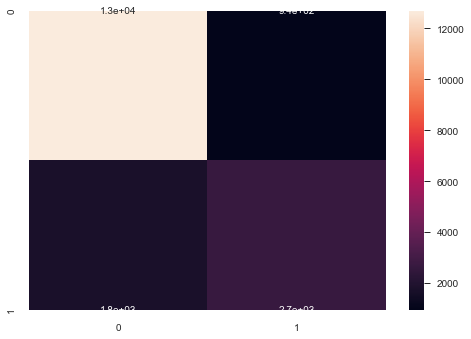

In [104]:
# heatmap of confusion matrix 
sns.heatmap(cf, annot = True)

In [105]:
# Assign test data into new variable
test_data = X_test

# Create column to insert predictions
test_data['predictions'] = y_pred

In [106]:
# Describe why the 
test_data[test_data['predictions']==0].describe()

,age,education-num,capital-gain,capital-loss,hours-per-week,Female,Male,10th,11th,12th,...,White,Federal-gov,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,country,predictions
count,14459.000000,14459.000000,14459.000000,14459.000000,14459.000000,14459.000000,14459.000000,14459.000000,14459.000000,14459.000000,...,14459.000000,14459.000000,14459.000000,14459.000000,14459.000000,14459.000000,14459.000000,14459.000000,14459.000000,14459.0
mean,36.919427,9.542154,113.591950,48.225534,39.398714,0.383152,0.616848,0.031952,0.043226,0.016115,...,0.845425,0.023446,0.063282,0.769694,0.018051,0.083339,0.041635,0.000553,36.425617,0.0
std,13.225580,2.316395,701.148484,297.593451,11.603905,0.486172,0.486172,0.175880,0.203372,0.125920,...,0.361512,0.151319,0.243479,0.421043,0.133141,0.276404,0.199760,0.023516,5.988581,0.0
min,17.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,26.000000,9.000000,0.000000,0.000000,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,38.000000,0.0
50%,35.000000,9.000000,0.000000,0.000000,40.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,38.000000,0.0
75%,45.500000,10.000000,0.000000,0.000000,40.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,38.000000,0.0
max,90.000000,16.000000,13550.000000,3900.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,40.000000,0.0


In [107]:
test_data[test_data['predictions']==1].describe()

,age,education-num,capital-gain,capital-loss,hours-per-week,Female,Male,10th,11th,12th,...,White,Federal-gov,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,country,predictions
count,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,...,3630.000000,3630.000000,3630.000000,3630.000000,3630.00000,3630.000000,3630.000000,3630.000000,3630.000000,3630.0
mean,44.971350,12.387328,4981.941322,250.314050,46.880992,0.104683,0.895317,0.001928,0.001928,0.000551,...,0.913223,0.061708,0.089256,0.616529,0.10303,0.084022,0.044904,0.000551,36.244077,1.0
std,10.920225,2.010267,15761.295756,657.286659,11.518093,0.306187,0.306187,0.043877,0.043877,0.023469,...,0.281547,0.240658,0.285152,0.486298,0.30404,0.277459,0.207121,0.023469,6.643746,0.0
min,19.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.0
25%,37.000000,10.000000,0.000000,0.000000,40.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,38.000000,1.0
50%,44.000000,13.000000,0.000000,0.000000,45.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,38.000000,1.0
75%,52.000000,14.000000,4386.000000,0.000000,50.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,38.000000,1.0
max,90.000000,16.000000,99999.000000,3004.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,40.000000,1.0


In [108]:
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from inspect import signature

In [109]:
#Precision: how many from the predicted items are relevant
precision_score(y_test, y_pred)

0.7399449035812672

In [110]:
#Recall: how many relevant items were selected
recall_score(y_test, y_pred)

0.6031888614417247

In [111]:
f1_score(y_test, y_pred)

0.6646047259680811

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.40')

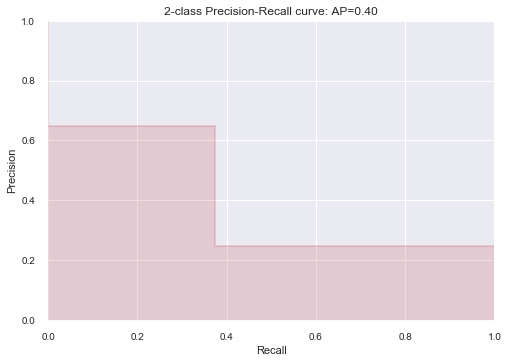

In [72]:
precision, recall, threshold = precision_recall_curve(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)
step_kwargs = ({'step': 'post'} if 'step' in signature(plt.fill_between).parameters else {})
plt.step(recall, precision, color='r', alpha=0.2, where='post')
plt.fill_between(recall, precision, alpha=0.2, color='r', **step_kwargs)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))